# Task 1 F

## Read the network and run it on the test set


In a separate python file, read the network and run the model on the first 10 examples in the test set.

Before you run the samples through the network, make sure you set the it to evaluation mode rather than training mode (network.eval()).

In training mode the dropout layer randomly sets node values to zero.
In evaluation mode, it multiplies each value by 1-dropout rate so the same pattern will generate the same output each time.

For each example, have your program print out the 10 output values (use only 2 decimal places), the index of the max output value, and the correct label of the digit. The network should correctly classify all 10 of the examples.

Have your program also plot the first 9 digits as a 3x3 grid with the prediction for each example below it,

Include a table (or screen shot) of your printed values and the plot of the first 9 digits in your report.



In [1]:
import sys

import nbimporter
import Task1AE as networkNotebook

import torch
import torch.optim as optim

import torchvision

from matplotlib import pyplot as plt


In [2]:
def init_network():
    # init network from notebook 1AE
    network = networkNotebook.NeuralNetwork()

    # init optimizer 
    learning_rate = 0.1
    momentum = 0.5
    optimizer = optim.SGD(network.parameters(),
                      lr=learning_rate,
                       momentum=momentum)
    
    # load the network state as we last saved them
    network_state_dict = torch.load("results/model.pth")
    network.load_state_dict(network_state_dict)
    
    return network

In [3]:
def load_first10_data(): 
    # get the loader
    test_loader = networkNotebook.loadData(is_train=False)
    test_data, test_targer = next(iter(test_loader))    
    return test_data[:10]

In [4]:
def run_network(network, data):

    # run the the network with test data
    network.eval()
    with torch.no_grad():
        output = network(data)
    return output

In [5]:

def print_plot_output(output,first10):
    # print values and index of max
    for data in output.data:
        print("\n")
        # print(data)
        meta_data = data.max(dim=0)
        formatted_list = [ '%.2f' % elem for elem in data ]
        print("values:")
        print(', '.join(formatted_list))
        print("index of max: {}".format(meta_data[1].item()))

    fig = plt.figure(figsize=(10,10))
    # plot
    for i in range(9):
        # 1. set the fig
        plt.subplot(3, 3, i+1)
        plt.tight_layout()
        plt.imshow(first10[i][0], cmap='gray', interpolation='none')
  
        # 2. get the list of prediciton and print
        preds = output.data.max(1, keepdim=True)[1]
    
        plt.title("Prediction: {}".format(
            preds[i].item()))

        # remove x, y values
        plt.xticks([])
        # plt.yticks([])

    


In [6]:
def main(argv): 
    network = init_network()
    first10 = load_first10_data()
    output = run_network(network, first10)
    print_plot_output(output, first10)

Task1AE.ipynb:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  ]




values:
-33.30, -27.07, -18.87, -20.64, -26.58, -31.91, -43.37, 0.00, -26.50, -19.35
index of max: 7


values:
-15.85, -15.95, -0.00, -16.68, -19.87, -29.83, -20.39, -15.22, -17.65, -28.19
index of max: 2


values:
-24.46, -0.00, -14.96, -21.94, -12.21, -23.11, -18.05, -13.77, -16.73, -21.74
index of max: 1


values:
-0.00, -28.81, -17.65, -22.95, -25.02, -18.40, -14.96, -24.83, -16.53, -18.02
index of max: 0


values:
-37.01, -31.93, -28.89, -33.48, -0.00, -27.44, -25.87, -25.79, -26.20, -11.21
index of max: 4


values:
-29.51, -0.00, -17.68, -25.86, -13.65, -27.34, -21.50, -15.72, -19.19, -25.20
index of max: 1


values:
-26.83, -13.34, -19.00, -19.62, -0.00, -15.74, -18.77, -14.46, -7.87, -6.13
index of max: 4


values:
-21.25, -21.22, -20.80, -14.46, -5.48, -8.26, -20.34, -15.22, -11.31, -0.00
index of max: 9


values:
-15.61, -23.54, -23.39, -19.59, -18.73, -0.02, -4.41, -25.87, -4.69, -13.02
index of max: 5


values:
-36.66, -31.47, -33.36, -25.41, -11.84, -22.20, -36.13, -13.8

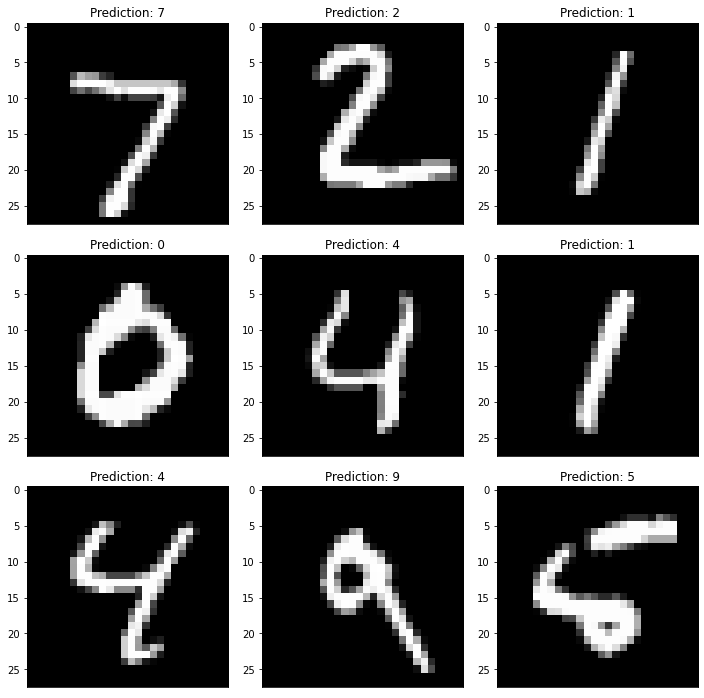

In [7]:
if __name__ == "__main__":
    main(sys.argv)